# Importing Data

In [1]:
import pandas as pd
df = pd.read_csv('Students.csv')

In [2]:
print(df.head())
print(df.shape)

  Student_Name                                      College_Name       Stream  \
0        Aarav       Indian Institute of Information Technology   Engineering   
1       Vivaan   Government Ram Bhajan Rai NES College, Jashpur      Commerce   
2       Aditya     Dolphin PG Institute of BioMedical & Natural       Science   
3       Vihaan  Shaheed Rajguru College of Applied Sciences for          Arts   
4        Arjun                   Roorkee College of Engineering       Science   

   Year_of_Study AI_Tools_Used  Daily_Usage_Hours  \
0              4        Gemini                0.9   
1              2       ChatGPT                3.4   
2              2       Copilot                3.6   
3              2       Copilot                2.9   
4              1        Gemini                0.9   

                       Use_Cases  Trust_in_AI_Tools  Impact_on_Grades  \
0       Assignments, Coding Help                  2                 2   
1            Learning new topics                

# Correlation Coefficients

In [3]:
corr_df = df.corr(numeric_only=True)
corr_df

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level
Year_of_Study,1.000000,0.007906,0.000744,-0.005867,-0.012708
Daily_Usage_Hours,0.007906,1.000000,-0.012369,0.057222,0.005981
Trust_in_AI_Tools,0.000744,-0.012369,1.000000,-0.047310,0.039466
Impact_on_Grades,-0.005867,0.057222,-0.047310,1.000000,-0.015721
Awareness_Level,-0.012708,0.005981,0.039466,-0.015721,1.000000


The numeric variables don't appear to show any significant linear relationship at all. However, there are a lot of non_numeric variables to test this relationship. Since many of the variables are categorical or multi-select, we have to process the data a lot to figure out correlations.

Notes:
- Use correlation ratio for categorical to numeric
- Use cramers v for categorical to categorical

## Converting Binary and Multi-Select Columns to 0 or 1

In [4]:
# convert yes/no columns to 0/1 to allow for correlation calculations
binary_columns = ["Do_Professors_Allow_Use", "Willing_to_Pay_for_Access"]
df[binary_columns] = df[binary_columns].replace({
    'Yes': 1, 'No': 0,
})

# convert multi-select columns (Ai_tools_used, use_cases) to multiple binary columns
multi_col_1 = 'Use_Cases'
df = df.join(df[multi_col_1].str.get_dummies(sep=', ').add_prefix(f'Use_'))

multi_col_2 = 'AI_Tools_Used'
df = df.join(df[multi_col_2].str.get_dummies(sep=', ').add_prefix(f'AI_Tool_'))

df = df.drop(columns=[multi_col_1, multi_col_2])
other_cols_to_drop = ['Student_Name', 'College_Name', 'State']
df = df.drop(columns=other_cols_to_drop)

In [5]:
corr_df = df.corr(numeric_only=True)
corr_df

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Awareness_Level,Willing_to_Pay_for_Access,Use_Assignments,Use_Coding Help,Use_Content Writing,...,Use_Project Work,Use_Projects,Use_Resume Writing,AI_Tool_Bard,AI_Tool_ChatGPT,AI_Tool_Claude,AI_Tool_Copilot,AI_Tool_Gemini,AI_Tool_Midjourney,AI_Tool_Other
Year_of_Study,1.000000,0.007906,0.000744,-0.005867,0.053934,-0.012708,0.016681,-0.008744,-0.013586,0.045134,...,-0.008500,-0.051430,0.024716,0.034448,-0.043521,0.030750,-0.008550,0.002923,-0.063732,0.007173
Daily_Usage_Hours,0.007906,1.000000,-0.012369,0.057222,0.022814,0.005981,0.029144,0.007313,0.016174,-0.005589,...,0.038416,-0.084594,0.050600,0.027914,-0.044830,0.020512,-0.091600,0.017539,0.009136,0.031434
Trust_in_AI_Tools,0.000744,-0.012369,1.000000,-0.047310,-0.023196,0.039466,0.003888,-0.052935,-0.045146,0.052210,...,-0.004208,0.016648,0.047427,0.012985,0.042708,-0.013583,0.083427,-0.061107,-0.046083,-0.001726
Impact_on_Grades,-0.005867,0.057222,-0.047310,1.000000,0.067598,-0.015721,0.010042,0.026643,0.028122,0.013472,...,-0.009948,0.002235,-0.012425,-0.034130,0.035791,-0.033301,-0.022007,0.011087,-0.027012,-0.001976
Do_Professors_Allow_Use,0.053934,0.022814,-0.023196,0.067598,1.000000,-0.045744,0.002119,0.023058,0.022695,-0.019090,...,-0.019314,0.036682,-0.042712,-0.006088,0.031920,0.003230,0.016994,-0.004202,-0.042689,-0.023350
Awareness_Level,-0.012708,0.005981,0.039466,-0.015721,-0.045744,1.000000,-0.005995,-0.008286,-0.011941,-0.001199,...,0.024574,0.014521,-0.033978,-0.026047,0.057712,-0.000741,-0.012254,0.005765,-0.000422,-0.016379
Willing_to_Pay_for_Access,0.016681,0.029144,0.003888,0.010042,0.002119,-0.005995,1.000000,-0.018665,-0.025934,0.021783,...,-0.011918,-0.017242,0.019389,0.029503,0.005837,-0.016449,0.011975,-0.010145,-0.018396,-0.008739
Use_Assignments,-0.008744,0.007313,-0.052935,0.026643,0.023058,-0.008286,-0.018665,1.000000,0.690256,-0.155300,...,-0.012498,-0.197691,-0.159424,0.022876,-0.108475,0.005017,-0.073581,0.079761,0.081219,0.011021
Use_Coding Help,-0.013586,0.016174,-0.045146,0.028122,0.022695,-0.011941,-0.025934,0.690256,1.000000,-0.186427,...,-0.023726,-0.200517,-0.141745,-0.010168,-0.098457,0.018355,-0.063553,0.057411,0.076659,0.014847
Use_Content Writing,0.045134,-0.005589,0.052210,0.013472,-0.019090,-0.001199,0.021783,-0.155300,-0.186427,1.000000,...,-0.000444,-0.172854,-0.125874,0.029125,-0.053024,0.019293,0.015761,-0.001071,-0.016636,0.028943


There still doesn't appear to be any significant linear correlations between these newly numeric variables and the previously existing numeric variables. I'm going to try and consolidate these categories to see if this changes anything.

In [6]:
# consolidated df
cdf = df.copy()

print(list(cdf.columns))

# Combine similar use cases to concentrate the data
to_combine_1 = ['Use_Exam Prep', 'Use_Exam Preparation', 'Use_MCQ Practice']
cdf['Use_Studying'] = (cdf[to_combine_1].sum(axis=1) > 0).astype(int)

to_combine_2 = ['Use_Project Work', 'Use_Projects', 'Use_Assignments', 'Use_Content Writing', 'Use_Coding Help']
cdf['Use_Work'] = (cdf[to_combine_2].sum(axis=1) > 0).astype(int)

to_combine_3 = ['Use_Coding Help', 'Use_Doubt Solving', 'Use_Learning new topics', 'Use_Notes']
cdf['Use_Learning'] = (cdf[to_combine_3].sum(axis=1) > 0).astype(int)

to_combine_4 = ['AI_Tool_Bard', 'AI_Tool_ChatGPT', 'AI_Tool_Gemini']
cdf['AI_Tool_Chatbot'] = (cdf[to_combine_4].sum(axis=1) > 0).astype(int)

to_combine_5 = ['AI_Tool_Copilot', 'AI_Tool_Claude']
cdf['AI_Tool_Coding'] = (cdf[to_combine_5].sum(axis=1) > 0).astype(int)

to_combine_6 = ['AI_Tool_Midjourney', 'AI_Tool_Other']
cdf['AI_Tool_Misc'] = (cdf[to_combine_6].sum(axis=1) > 0).astype(int)

# Drop Irrelevant Columns
to_drop = to_combine_1 + to_combine_2 + to_combine_3 + to_combine_4 + to_combine_5 + to_combine_6 + ['Use_Resume Writing']
cdf = cdf.drop(columns=to_drop)

print(list(cdf.columns))

['Stream', 'Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Impact_on_Grades', 'Do_Professors_Allow_Use', 'Preferred_AI_Tool', 'Awareness_Level', 'Willing_to_Pay_for_Access', 'Device_Used', 'Internet_Access', 'Use_Assignments', 'Use_Coding Help', 'Use_Content Writing', 'Use_Doubt Solving', 'Use_Exam Prep', 'Use_Exam Preparation', 'Use_Learning new topics', 'Use_MCQ Practice', 'Use_Notes', 'Use_Project Work', 'Use_Projects', 'Use_Resume Writing', 'AI_Tool_Bard', 'AI_Tool_ChatGPT', 'AI_Tool_Claude', 'AI_Tool_Copilot', 'AI_Tool_Gemini', 'AI_Tool_Midjourney', 'AI_Tool_Other']
['Stream', 'Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Impact_on_Grades', 'Do_Professors_Allow_Use', 'Preferred_AI_Tool', 'Awareness_Level', 'Willing_to_Pay_for_Access', 'Device_Used', 'Internet_Access', 'Use_Studying', 'Use_Work', 'Use_Learning', 'AI_Tool_Chatbot', 'AI_Tool_Coding', 'AI_Tool_Misc']


In [7]:
corr_df = cdf.corr(numeric_only=True)
corr_df

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Awareness_Level,Willing_to_Pay_for_Access,Use_Studying,Use_Work,Use_Learning,AI_Tool_Chatbot,AI_Tool_Coding,AI_Tool_Misc
Year_of_Study,1.000000,0.007906,0.000744,-0.005867,0.053934,-0.012708,0.016681,-0.017881,-0.008679,0.007309,-0.034670,0.004629,-0.050111
Daily_Usage_Hours,0.007906,1.000000,-0.012369,0.057222,0.022814,0.005981,0.029144,-0.000620,-0.039890,0.038225,0.007840,-0.081875,0.026329
Trust_in_AI_Tools,0.000744,-0.012369,1.000000,-0.047310,-0.023196,0.039466,0.003888,-0.029835,0.013527,-0.055883,-0.029831,0.076739,-0.040311
Impact_on_Grades,-0.005867,0.057222,-0.047310,1.000000,0.067598,-0.015721,0.010042,-0.021206,0.028122,0.000313,0.040438,-0.035940,-0.024198
Do_Professors_Allow_Use,0.053934,0.022814,-0.023196,0.067598,1.000000,-0.045744,0.002119,0.053772,0.024540,-0.011792,0.005492,0.018184,-0.050171
Awareness_Level,-0.012708,0.005981,0.039466,-0.015721,-0.045744,1.000000,-0.005995,-0.026344,0.000827,-0.013487,0.036802,-0.012436,-0.010020
Willing_to_Pay_for_Access,0.016681,0.029144,0.003888,0.010042,0.002119,-0.005995,1.000000,-0.005234,-0.015896,-0.008580,0.001876,0.004844,-0.020840
Use_Studying,-0.017881,-0.000620,-0.029835,-0.021206,0.053772,-0.026344,-0.005234,1.000000,-0.066364,-0.256647,0.026495,0.002957,-0.050616
Use_Work,-0.008679,-0.039890,0.013527,0.028122,0.024540,0.000827,-0.015896,-0.066364,1.000000,-0.489041,-0.053318,-0.037621,0.043721
Use_Learning,0.007309,0.038225,-0.055883,0.000313,-0.011792,-0.013487,-0.008580,-0.256647,-0.489041,1.000000,0.032500,-0.020645,0.021152


Once again there is no evidence of substantial linear relationships between the variables, especially between the use cases and the impacct on grades, which has me concerned about whether I'll be able to determine anything from this data. However, it also presents the intriguing possibility that machine learning models might be able to figure out something about the data that more generic statistical methods can't determine.
Additionally, there are other single-select categorical variables (Stream (major), Preferred AI Tool, Device Used, Internet Access) to still process that might have some relevant takeaways. I will be separately testing my consolidated dataframe and my normal data frame to see if my choices of consolidation are helpful at all.

## Processing Single-Select Categorical Variables

In [8]:
# I need a function to calculate the correlation ratio between a categorical and numeric variable
# I found this library which can calculate the 'eta-square', which is a correlation ratio used for categorical and numeric comparison
import numpy as np
def correlation_ratio(categories, values):

    # Unique groups
    groups = np.unique(categories)

    # Means
    group_means = []
    group_sizes = []

    for g in groups:
        vals = values[categories == g]
        group_means.append(vals.mean())
        group_sizes.append(len(vals))

    grand_mean = values.mean()

    # Between-group variance
    ss_between = np.sum([
        group_sizes[i] * (group_means[i] - grand_mean)**2
        for i in range(len(groups))
    ])

    # Total variance
    ss_total = np.sum((values - grand_mean)**2)

    return np.sqrt(ss_between / ss_total)

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categoric_cols = ['Stream', 'Preferred_AI_Tool', 'Device_Used', 'Internet_Access']

cat_corr_arr = np.zeros((len(categoric_cols), len(numeric_cols)))

for index1, cat in enumerate(categoric_cols):
    for index2, num in enumerate(numeric_cols):
        eta = correlation_ratio(np.array(df[cat]), np.array(df[num]))
        cat_corr_arr[index1][index2] = eta

cat_corr_df = pd.DataFrame(cat_corr_arr, columns=numeric_cols)
cat_corr_df
# Note that 0 is Stream, 1 is Preferred AI Tool, 2 is Device Used, 3 is Internet Access

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Awareness_Level,Willing_to_Pay_for_Access,Use_Assignments,Use_Coding Help,Use_Content Writing,...,Use_Project Work,Use_Projects,Use_Resume Writing,AI_Tool_Bard,AI_Tool_ChatGPT,AI_Tool_Claude,AI_Tool_Copilot,AI_Tool_Gemini,AI_Tool_Midjourney,AI_Tool_Other
0,0.097351,0.138912,0.044403,0.071123,0.052085,0.103040,0.067345,0.094649,0.096420,0.117349,...,0.060620,0.117728,0.139187,0.080308,0.150288,0.080294,0.114345,0.088983,0.078867,0.036461
1,0.056047,0.090722,0.046742,0.057018,0.091542,0.040309,0.032495,0.072894,0.082092,0.098029,...,0.249672,0.122749,0.068337,0.191104,0.162062,0.180937,0.187892,0.145142,0.114370,0.195415
2,0.034806,0.029133,0.054088,0.013351,0.027254,0.046158,0.005385,0.062395,0.055560,0.007400,...,0.023893,0.055585,0.030483,0.008462,0.022104,0.016947,0.030372,0.040130,0.036924,0.034783
3,0.032487,0.027332,0.008118,0.002514,0.010475,0.005411,0.010546,0.019296,0.028877,0.034596,...,0.019928,0.019362,0.022976,0.042424,0.015000,0.013480,0.025715,0.006552,0.005083,0.017216


In [10]:
numeric_cols = cdf.select_dtypes(include=[np.number]).columns
categoric_cols = ['Stream', 'Preferred_AI_Tool', 'Device_Used', 'Internet_Access']

cat_corr_arr = np.zeros((len(categoric_cols), len(numeric_cols)))

for index1, cat in enumerate(categoric_cols):
    for index2, num in enumerate(numeric_cols):
        eta = correlation_ratio(cdf[cat], cdf[num])
        cat_corr_arr[index1][index2] = eta

cat_corr_cdf = pd.DataFrame(cat_corr_arr, columns=numeric_cols)
cat_corr_cdf
# Note that 0 is Stream, 1 is Preferred AI Tool, 2 is Device Used, 3 is Internet Access

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Awareness_Level,Willing_to_Pay_for_Access,Use_Studying,Use_Work,Use_Learning,AI_Tool_Chatbot,AI_Tool_Coding,AI_Tool_Misc
0,0.097351,0.138912,0.044403,0.071123,0.052085,0.103040,0.067345,0.105693,0.045772,0.066796,0.104661,0.105475,0.079186
1,0.056047,0.090722,0.046742,0.057018,0.091542,0.040309,0.032495,0.051573,0.096196,0.084593,0.164060,0.117877,0.062914
2,0.034806,0.029133,0.054088,0.013351,0.027254,0.046158,0.005385,0.075284,0.023943,0.048122,0.033352,0.022856,0.038979
3,0.032487,0.027332,0.008118,0.002514,0.010475,0.005411,0.010546,0.024865,0.009668,0.042592,0.006522,0.019759,0.005825


This is a table of correlation coefficients that show how much of the variation in a numeric variable is predicted by the variation in categories. While these numbers are slightly larger than others for both my normal data frame and the consolidated one, I'm still not seeing any significant enough impacts on things like "Impact_on_Grades" to give me confidence that I can reliably predict these variables somehow. The only way to see is by training models at this point.

# Training Models on the Dataset
Now I'm going to train models to try to predict the impact on grades students reported AI having on them.
### One-Hot Encoding Categorical Variables
Most of the data is ready to be put in ML models, but the categorical variables still need to be one-hot encoded.

In [11]:
df = pd.get_dummies(df, columns=categoric_cols, drop_first=True)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

cdf = pd.get_dummies(cdf, columns=categoric_cols, drop_first=True)
bool_cols = cdf.select_dtypes(include='bool').columns
cdf[bool_cols] = cdf[bool_cols].astype(int)
df.head()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Awareness_Level,Willing_to_Pay_for_Access,Use_Assignments,Use_Coding Help,Use_Content Writing,...,Stream_Science,Preferred_AI_Tool_ChatGPT,Preferred_AI_Tool_Claude,Preferred_AI_Tool_Copilot,Preferred_AI_Tool_Gemini,Preferred_AI_Tool_Other,Device_Used_Mobile,Device_Used_Tablet,Internet_Access_Medium,Internet_Access_Poor
0,4,0.9,2,2,0,9,1,1,1,0,...,0,0,0,1,0,0,1,0,0,1
1,2,3.4,3,-3,1,6,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,3.6,5,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
3,2,2.9,5,2,1,5,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,0.9,1,3,1,8,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0


## Split Data

In [12]:
from sklearn.model_selection import train_test_split

# Replace with your actual target column
target = 'Impact_on_Grades'

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

cX = cdf.drop(columns=[target])
cy = cdf[target]

cX_train, cX_test, cy_train, cy_test = train_test_split(
    cX, cy, test_size=0.2, random_state=20
)

## Mean Model
In order to see if my model is better than simply selecting the mean of the impact on grades variable, I'm calculating the MSE of the mean versus other values.

In [13]:
from sklearn.metrics import mean_squared_error

grade_impact_array = df['Impact_on_Grades'].to_numpy()

mean_total = 0
for entry in grade_impact_array:
    mean_total += entry
real_mean = mean_total / len(grade_impact_array)
real_mean_arr = [real_mean] * len(grade_impact_array)

mean_mse = mean_squared_error(grade_impact_array, real_mean_arr)
print(mean_mse)

5.618694010778351


If the models are better at predicting the grade impact than simply choosing the mean (which happens to be super close to 0), then their MSE will be less than this value.
## Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

lr_mse = mean_squared_error(y_test, pred)
print("lr_mse:", lr_mse)

lr_mse: 5.738718681638612


In [15]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coef": reg.coef_
}).sort_values("coef", ascending=False)

#print(coef_df)

Comparing the mean MSE of **~5.619** and the unconsolidated linear regression MSE of **~5.7387** show that even with all 42 columns of data, linear regression cannot find any features whatsoever to latch on to that improve its ability to predict the impact on grades. This makes a lot of sense, given that no correlations were significant determiners of the impact on grades. I'm going to try with my consolidated multi-select categories to see if it improves at all.

In [16]:
creg = LinearRegression()
creg.fit(cX_train, cy_train)

cpred = creg.predict(cX_test)

clr_mse = mean_squared_error(cy_test, cpred)
print("clr_mse:", clr_mse)

clr_mse: 5.761893785870103


The consolidation of categories didn't help this model whatsoever.
## Random Forests Model
Now it's time to see if a random forest model can demonstrate any improved ability to determine the impact on grades these variables can have

In [17]:
from sklearn.ensemble import RandomForestRegressor

# these are mostly the default parameters, and the ones I had the most success with
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth = None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=1.0,
    random_state=20
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)

print("random forest mse:", rf_mse)

random forest mse: 3.647471715076072


In [18]:
crf = RandomForestRegressor(
    n_estimators=200,
    max_depth = None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=1.0,
    random_state=20
)
crf.fit(cX_train, cy_train)

crf_pred = crf.predict(cX_test)

crf_mse = mean_squared_error(cy_test, crf_pred)

print("consolidated random forest mse:", crf_mse)

consolidated random forest mse: 3.750715110650069


It appears that the random forests model was able to improve upon both a simple mean prediction and linear regression, but not by too much. Later I will use SHAP to figure out which variables had the most impact.
Additionally, it appears that the consolidation may have slightly hurt the model's ability to make predictions. This does make sense, because consolidating reduced the amount of data, and I'm curious to figure out how being more specific about the use cases and models used matters.

## Feed-Forward Neural Network

In [19]:
import torch
print(X_train.shape)
# convert to tensors for faster math
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)

X_test_t = torch.tensor(X_test.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

cX_train_t = torch.tensor(cX_train.values, dtype=torch.float32)
cy_train_t = torch.tensor(cy_train.values, dtype=torch.float32).reshape(-1, 1)

cX_test_t = torch.tensor(cX_test.values, dtype=torch.float32)
cy_test_t = torch.tensor(cy_test.values, dtype=torch.float32).reshape(-1, 1)

(2891, 43)


In [20]:
import torch
import seaborn as sns
from matplotlib import pyplot as plt

# modified from codelets and labs
class FNNModel(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens, sigma=0.01):
        super().__init__()

        self.num_inputs = num_inputs

        self.W1 = torch.nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = torch.nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = torch.nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = torch.nn.Parameter(torch.zeros(num_outputs))

        self.epoch_loss_list = np.array([])

    def forward(self, X):
        X = X.to(torch.float32)
        X = X.reshape((-1, self.num_inputs))
        H1 = torch.relu(torch.matmul(X, self.W1) + self.b1)
        unactivated_output = torch.matmul(H1, self.W2) + self.b2
        return unactivated_output

def train(model, X_train, y_train, X_test, y_test, epochs, batch_size, my_lr, text_output=False):
    optimizer = torch.optim.SGD(model.parameters(), lr=my_lr)
    loss_fn = torch.nn.MSELoss()

    training_loss_arr = []
    validation_loss_arr = []

    for epoch in range(epochs):
        epoch_training_loss_sum = 0
        epoch_validation_loss_sum = 0

        # training per epoch
        for start in range(0, X_train.shape[0], batch_size):
            end = start + batch_size
            x_batch = X_train[start:end]
            y_batch = y_train[start:end]
            
            predicted_y = model(x_batch)
            training_loss = loss_fn(predicted_y, y_batch)
            
            optimizer.zero_grad()
            training_loss.backward()
            optimizer.step()

            epoch_training_loss_sum += training_loss.item()

        # validation per epoch
        with torch.no_grad():
            for start in range(0, X_test.shape[0], batch_size):
                end = start + batch_size
                x_batch = X_test[start:end]
                y_batch = y_test[start:end]
                
                predicted_y = model(x_batch)
                validation_loss = loss_fn(predicted_y, y_batch)
                epoch_validation_loss_sum += validation_loss.item()

        if (epoch % 10 == 0 and text_output):
            print(f"epoch {epoch}, training loss: {epoch_training_loss_sum}, validation loss: {epoch_validation_loss_sum * 4}")
        training_loss_arr.append(epoch_training_loss_sum)
        validation_loss_arr.append(epoch_validation_loss_sum * 4)
    plt.plot(training_loss_arr, label='Training Loss')
    plt.plot(validation_loss_arr, label='Validation Loss')
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.show()


### Tuning Hyperparameters

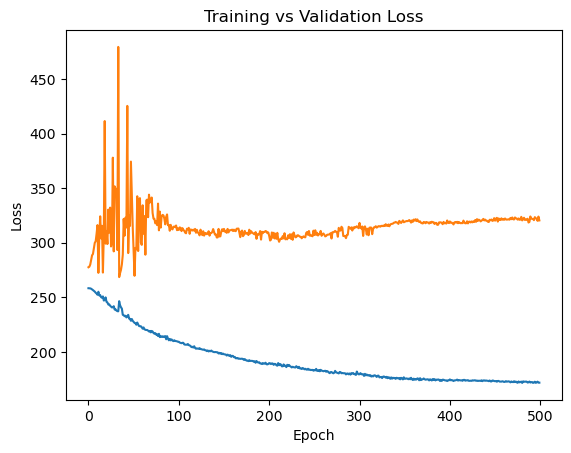

In [21]:
model = FNNModel(X_train.shape[1], 1, 10)
train(model, X_train_t, y_train_t, X_test_t, y_test_t, 500, 64, 0.05)

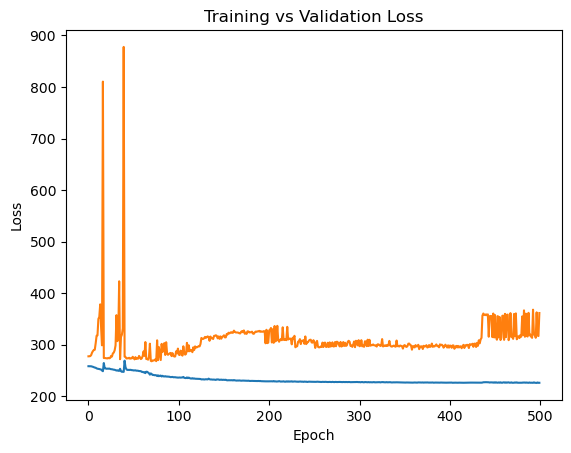

In [22]:
model = FNNModel(cX_train.shape[1], 1, 10)
train(model, cX_train_t, cy_train_t, cX_test_t, cy_test_t, 500, 64, 0.05)

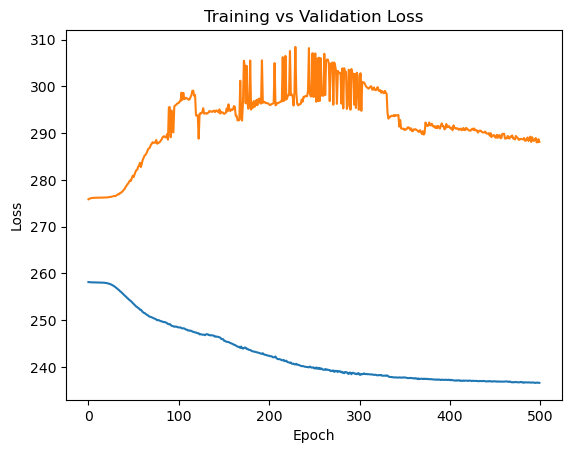

In [23]:
model = FNNModel(cX_train.shape[1], 1, 4)
train(model, cX_train_t, cy_train_t, cX_test_t, cy_test_t, 500, 64, 0.005)

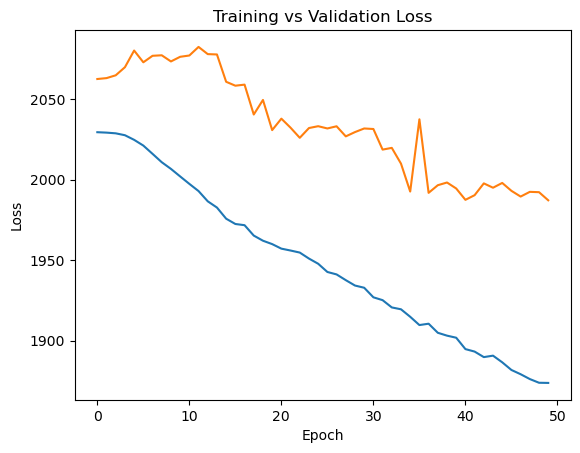

In [24]:
model = FNNModel(cX_train.shape[1], 1, 10)
train(model, cX_train_t, cy_train_t, cX_test_t, cy_test_t, 50, 8, 0.005)

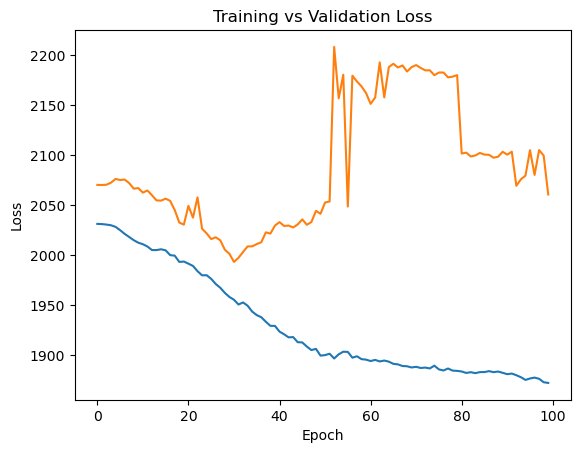

In [25]:
model = FNNModel(cX_train.shape[1], 1, 5)
train(model, cX_train_t, cy_train_t, cX_test_t, cy_test_t, 100, 8, 0.01)

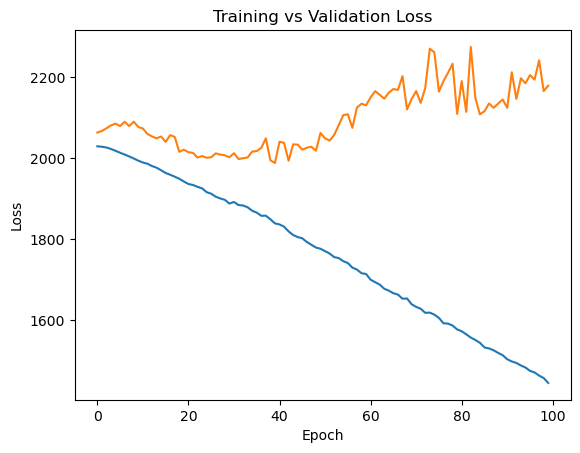

In [26]:
model = FNNModel(cX_train.shape[1], 1, 40)
train(model, cX_train_t, cy_train_t, cX_test_t, cy_test_t, 100, 8, 0.005)

After a lot of experimentation with the hyperparameters, I was unable to improve the validation loss beyond about 5% less than the first epoch, and even then the hyperparameters that worked were very finnicky. It seems that FNNs are incapable of discovering generalizable features in the dataset. In my next milestone, I will try to work with FNNs a bit more in Keras, where it'll be easier to manipulate parameters and experiment with dropout. I'll also look more into random forests and what they're focusing on to get some improvement in predictions.